In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
#preprocessed dataset
boston = pd.read_csv('datasets/boston.csv')
boston.head()

,crime rate,residential land zone,business acres,Charles River,nitric oxides,number of rooms,age,distances to employment centres,accessibility to highways,property-tax,pupil-teacher ratio,lower income levels,Median Home Value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [5]:
features = list(boston.columns[:-1])
features

['crime rate',
 'residential land zone',
 'business acres',
 'Charles River',
 'nitric oxides',
 'number of rooms',
 'age',
 'distances to employment centres',
 'accessibility to highways',
 'property-tax',
 'pupil-teacher ratio',
 'lower income levels']

In [6]:
from sklearn.decomposition import PCA

def apply_pca(X, n, add_constant= False):
    pca = PCA(n_components= n)
    x_new = pca.fit_transform(X)
    
    if add_constant is True:
        x_new = sm.add_constant(x_new)
        
    return pca, pd.DataFrame(x_new)

In [7]:
pca, _ = apply_pca(boston[features], len(features))
print("explained variance: ", pca.explained_variance_ratio_)

explained variance:  [9.60040728e-01 2.73884414e-02 8.89341069e-03 1.72579506e-03
 9.36295702e-04 5.35816960e-04 3.19581712e-04 1.09868221e-04
 3.93666446e-05 8.58505778e-06 2.00834312e-06 1.02396314e-07]


In [8]:
sum(pca.explained_variance_ratio_)

1.0

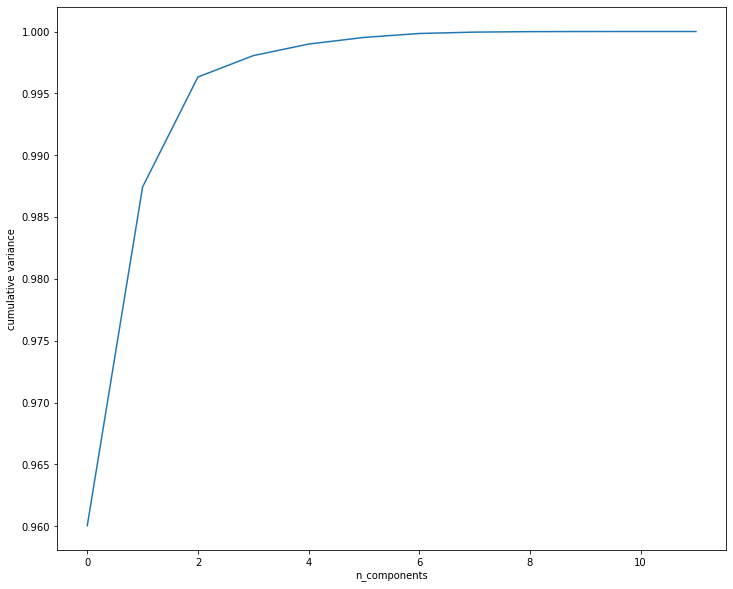

In [9]:
plt.figure(figsize= (12,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('n_components')
plt.ylabel('cumulative variance');

In [10]:
def build_model(regression, target, features, dataset, *hyperparameters):
    
    X = dataset[features]
    Y = dataset[target]
    
    _, X_new = apply_pca(X, *hyperparameters)
    x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size= 0.2)
    model = regression(x_train, y_train)
    y_pred = model.predict(x_test)
    
    return{
        'x_initial': X,
        'x_transform': X_new,
        'x_train': x_train,
        'x_test': x_test,
        'y_train': y_train,
        'y_test': y_test,
        'y_pred': y_pred,
        'model': model
    }

In [11]:
def ols_reg(x_train, y_train):
    ols = sm.OLS(y_train, x_train)
    model = ols.fit()
    return model

In [12]:
def linear_reg(x_train, y_train):
    model = LinearRegression().fit(x_train, y_train)
    return model

In [13]:
model_params = {}
model_params['statsmodel_reg'] = build_model(ols_reg,
                                             'Median Home Value',
                                             features,
                                             boston,
                                             7,
                                             True)
model = model_params['statsmodel_reg']['model']
x_initial = model_params['statsmodel_reg']['x_initial']
x_transform = model_params['statsmodel_reg']['x_transform']
x_train = model_params['statsmodel_reg']['x_train']
x_test = model_params['statsmodel_reg']['x_test']
y_train = model_params['statsmodel_reg']['y_train']
y_test = model_params['statsmodel_reg']['y_test']
y_pred = model_params['statsmodel_reg']['y_pred']

In [14]:
x_transform.shape

(506, 8)

Text(0, 0.5, 'X[1] (residential land zone)')

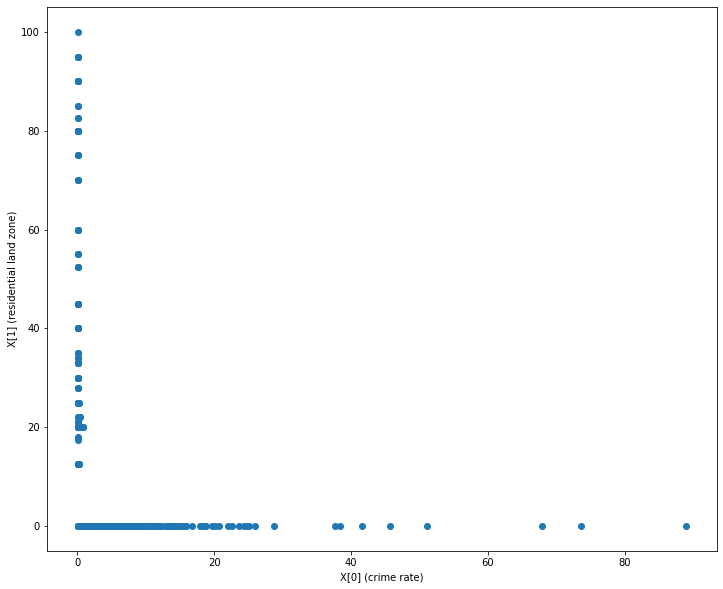

In [16]:
fig, ax = plt.subplots(figsize = (12,10))
ax.scatter(x_initial['crime rate'], x_initial['residential land zone'],
           cmap= 'Spectral')
plt.xlabel('X[0] (crime rate)')
plt.ylabel('X[1] (residential land zone)')

Text(0, 0.5, 'principal component 2')

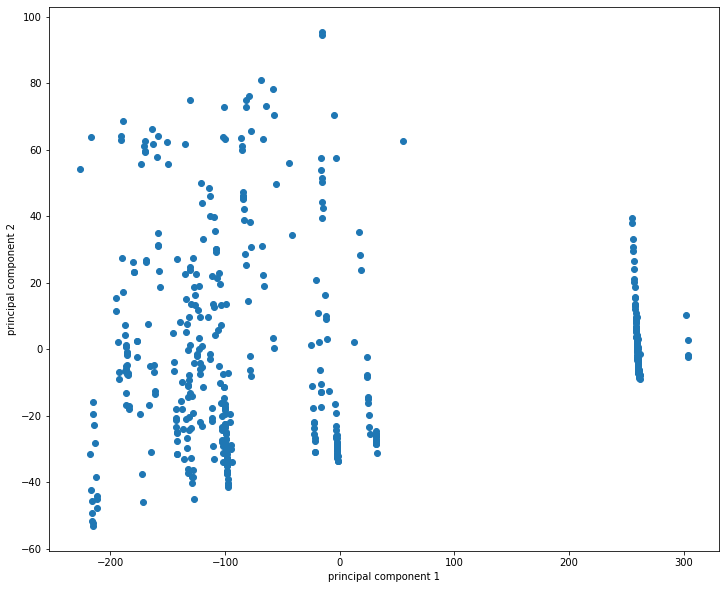

In [17]:
fig, ax = plt.subplots(figsize = (12,10))
ax.scatter(x_transform[1], x_transform[2],
           cmap= 'Spectral')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')

In [18]:
print('r squared', model.rsquared)
print('adj r squared', model.rsquared_adj)

r squared 0.5845250253739891
adj r squared 0.5771807707720141


In [19]:
model_params['sklearn_reg'] = build_model(linear_reg,
                                             'Median Home Value',
                                             features,
                                             boston,
                                             6)
model = model_params['sklearn_reg']['model']
x_transform = model_params['sklearn_reg']['x_transform']
x_train = model_params['sklearn_reg']['x_train']
x_test = model_params['sklearn_reg']['x_test']
y_train = model_params['sklearn_reg']['y_train']
y_test = model_params['sklearn_reg']['y_test']
y_pred = model_params['sklearn_reg']['y_pred']

In [20]:
x_transform.shape

(506, 6)

In [21]:
print('training score: ', model.score(x_train, y_train))
print('testing score: ', r2_score(y_test, y_pred))

training score:  0.5973431491756573
testing score:  0.5235041263121303
